In [19]:
# Got to get numpy and matplotlib for my data visualization
from collections import defaultdict
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Drawing data from different columns of my csv file
import csv
# Making sure I append each value to a list
columns = defaultdict(list)

with open('Desktop/prize_money_1.csv') as f:
    reader = csv.DictReader(f) # reads rows into a dict format
    for row in reader: # read a row as: {column1:value1, column2: value2,...}
        for (k,v) in row.items(): # for over each column name and value
            columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k
            
Us_list = columns['US'] # Just data for US Open
Ao_list = columns['AO'] # Just data for Australian Open
Fo_list = columns['FO'] # Just data for French Open
W_list = columns['W'] # Just data for Wimbledon

years_list = columns['Years']
dummy_list = [str.strip() for str in years_list]
years = [int(item) for item in dummy_list]

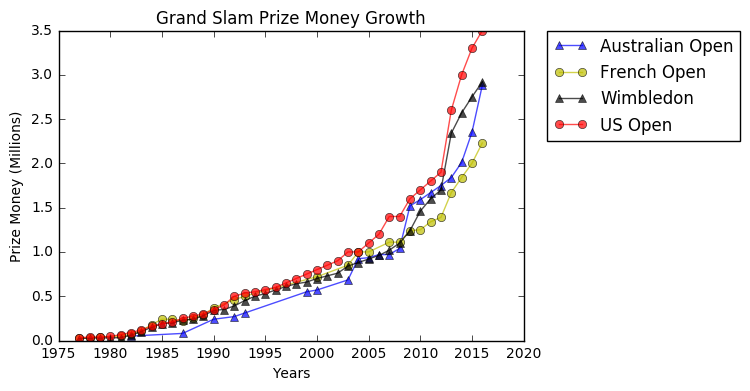

In [21]:
# Getting everything on one figure to compare prize money growth between each slam
# I do not have data for every year for the AO Open, so I must mask my data
line1, = plt.plot(array_years[s1mask],series1[s1mask],'b-^', label = 'Australian Open', alpha = 0.7)
line2, = plt.plot(array_years[s2mask],series2[s2mask],'y-o', label = 'French Open', alpha = 0.7)
line3, = plt.plot(array_years[s3mask],series3[s3mask],'k-^', label = 'Wimbledon', alpha = 0.7)
line4, = plt.plot(array_years[s4mask],series4[s4mask],'r-o', label = 'US Open', alpha = 0.7)
plt.title("Grand Slam Prize Money Growth")
plt.xlabel("Years")
plt.ylabel("Prize Money (Millions)")
# Creating a "key" to help user read data
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad=0.)

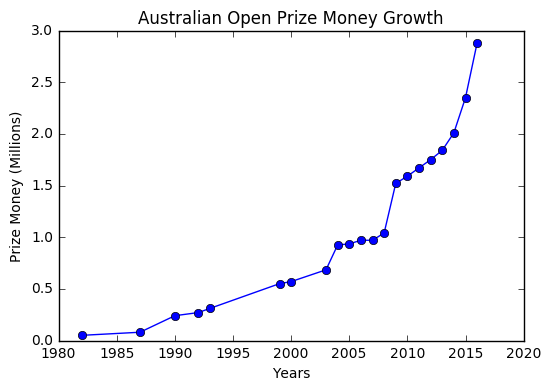

In [22]:
import numpy as np
# Masking missing data values
dum_ao = [str.strip() for str in Ao_list]
ao_final = [None if item==''else item for item in dum_ao] # [2.5, None, 2.1, ...]
array_years = np.array(years)
series1 = np.array(ao_final).astype(np.double)
s1mask = np.isfinite(series1)
plt.plot(array_years[s1mask],series1[s1mask],'b-o')
plt.title("Australian Open Prize Money Growth")
plt.xlabel("Years")
plt.ylabel("Prize Money (Millions)")

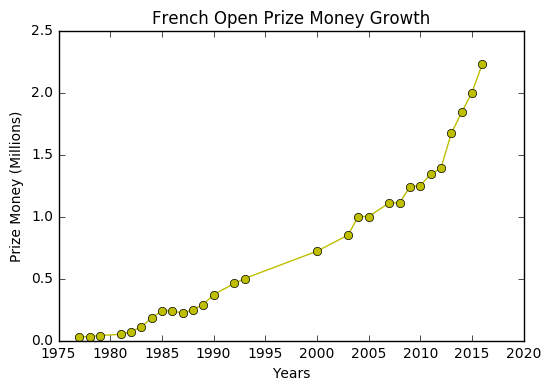

In [23]:
import numpy as np
# Masking missing data values
dum_fo = [str.strip() for str in Fo_list]
fo_final = [None if item==''else item for item in dum_fo] # [2.5, None, 2.1, ...]
array_years = np.array(years)
series2 = np.array(fo_final).astype(np.double)
s2mask = np.isfinite(series2)
plt.plot(array_years[s2mask],series2[s2mask],'y-o')
plt.title("French Open Prize Money Growth")
plt.xlabel("Years")
plt.ylabel("Prize Money (Millions)")

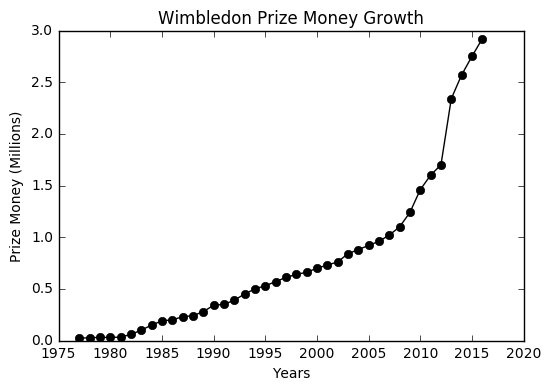

In [24]:
import numpy as np
# Masking missing data values
dum_w = [str.strip() for str in W_list]
w_final = [None if item==''else item for item in dum_w] # [2.5, None, 2.1, ...]
array_years = np.array(years)
series3 = np.array(w_final).astype(np.double)
s3mask = np.isfinite(series3)
plt.plot(array_years[s3mask],series3[s3mask],'k-o')
plt.title("Wimbledon Prize Money Growth")
plt.xlabel("Years")
plt.ylabel("Prize Money (Millions)")

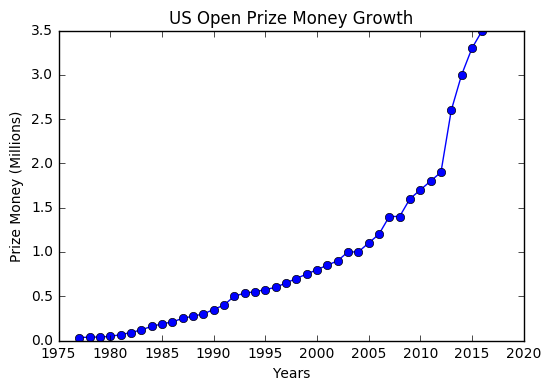

In [41]:
import numpy as np
# Masking missing data values
dum_us = [str.strip() for str in Us_list]
us_final = [None if item==''else item for item in dum_us] # [2.5, None, 2.1, ...]
array_years = np.array(years)
series4 = np.array(us_final).astype(np.double)
s4mask = np.isfinite(series4)
plt.plot(array_years[s4mask],series4[s4mask],'b-o')
plt.title("US Open Prize Money Growth")
plt.xlabel("Years")
plt.ylabel("Prize Money (Millions)")

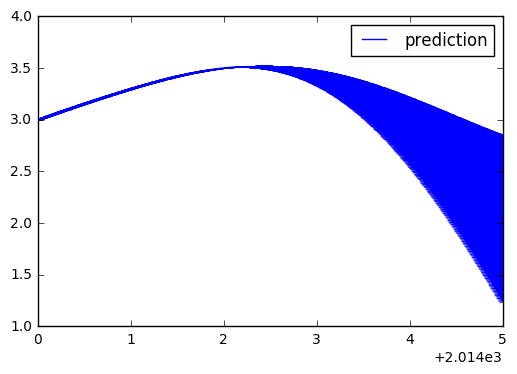

In [62]:
# Prediction Model for: US Open
# Gaussian Process: Every point is some continuous input associated with a normally distributed
# random variable. It measures the similarity between points to predict the value for an unseen
# point from training data. It also contains uncertainty information. 
import numpy as np
import sklearn.gaussian_process
# Need pandas to help with data frame
import pandas as pd
import matplotlib

# random variable
np.random.seed(1)

X = np.atleast_2d([2012,2013,2014,2015,2016]).T
y = np.array([1.9,2.6,3.0,3.3,3.5])

x_new = np.atleast_2d(np.linspace(2014, 2019, 1000)).T

gp = sklearn.gaussian_process.GaussianProcess()
gp.fit(X, y)
y_pred, MSE = gp.predict(x_new, eval_MSE=True)
sigma = np.sqrt(MSE)

df = pd.DataFrame(dict(prediction=y_pred, se=sigma), index=x_new)
df.plot(yerr='se')

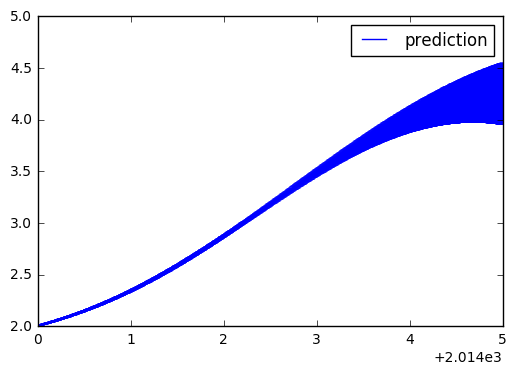

In [73]:
# Prediction model for: Australian Open
# Gaussian Process: Every point is some continuous input associated with a normally distributed
# random variable. It measures the similarity between points to predict the value for an unseen
# point from training data. It also contains uncertainty information. 
import numpy as np
import sklearn.gaussian_process
# Need pandas to help with data frame
import pandas as pd
import matplotlib

# random variable
np.random.seed(1)

X = np.atleast_2d([2012,2013,2014,2015,2016]).T
y = np.array([1.75,1.84,2.01,2.35,2.88])

x_new = np.atleast_2d(np.linspace(2014, 2019, 1000)).T

gp = sklearn.gaussian_process.GaussianProcess()
gp.fit(X, y)
y_pred, MSE = gp.predict(x_new, eval_MSE=True)
sigma = np.sqrt(MSE)

df = pd.DataFrame(dict(prediction=y_pred, se=sigma), index=x_new)
df.plot(yerr='se')

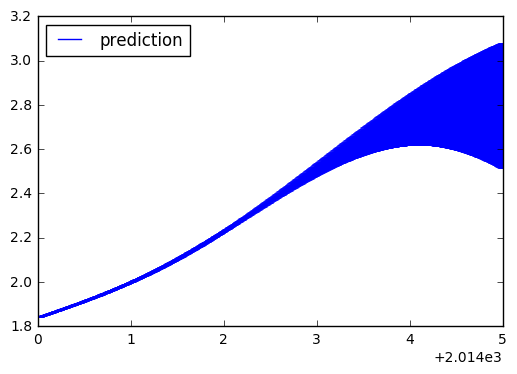

In [77]:
# Prediction model for: French Open
# Gaussian Process: Every point is some continuous input associated with a normally distributed
# random variable. It measures the similarity between points to predict the value for an unseen
# point from training data. It also contains uncertainty information. 
import numpy as np
import sklearn.gaussian_process
# Need pandas to help with data frame
import pandas as pd
import matplotlib

# random variable
np.random.seed(1)

X = np.atleast_2d([2012,2013,2014,2015,2016]).T
y = np.array([1.39,1.67,1.84,2.0,2.23])

x_new = np.atleast_2d(np.linspace(2014, 2019, 1000)).T

gp = sklearn.gaussian_process.GaussianProcess()
gp.fit(X, y)
y_pred, MSE = gp.predict(x_new, eval_MSE=True)
sigma = np.sqrt(MSE)

df = pd.DataFrame(dict(prediction=y_pred, se=sigma), index=x_new)
df.plot(yerr='se')

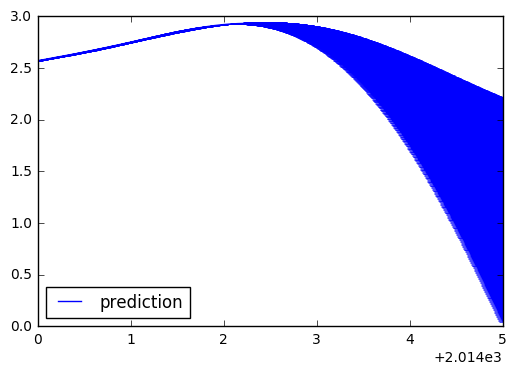

In [82]:
# Prediction model for: Wimbledon
# Gaussian Process: Every point is some continuous input associated with a normally distributed
# random variable. It measures the similarity between points to predict the value for an unseen
# point from training data. It also contains uncertainty information. 
import numpy as np
import sklearn.gaussian_process
# Need pandas to help with data frame
import pandas as pd
import matplotlib

# random variable
np.random.seed(1)

X = np.atleast_2d([2012,2013,2014,2015,2016]).T
y = np.array([1.7,2.34,2.57,2.75,2.92])

x_new = np.atleast_2d(np.linspace(2014, 2019, 1000)).T

gp = sklearn.gaussian_process.GaussianProcess()
gp.fit(X, y)
y_pred, MSE = gp.predict(x_new, eval_MSE=True)
sigma = np.sqrt(MSE)

df = pd.DataFrame(dict(prediction=y_pred, se=sigma), index=x_new)
df.plot(yerr='se')